In [3]:
import pandas as pd
import numpy as np
import gurobipy as gp
from gurobipy import GRB
import os
import sys
import itertools
import matplotlib.pyplot as plt
import seaborn as sns


In [15]:
project_root = os.path.abspath(os.getcwd())

data_dir = os.path.join(os.path.dirname(project_root))

results_dir = os.path.join(data_dir, 'results')

figures_dir = os.path.join(data_dir, 'figures')





# Summer month

results_basecase_summer = pd.read_csv(os.path.join(results_dir, 'results_basecase_summer.csv'),sep=',')
#results_basecase_winter = pd.read_csv(os.path.join(results_dir, 'results_basecase_winter.csv'), sep=',')
#results_case_1_winter = pd.read_csv(os.path.join(results_dir, 'results_case_1_winter.csv'), sep=',')
#results_case_2_summer = pd.read_csv(os.path.join(results_dir,'results_case_2_summer.csv'), sep=',')
#results_case_2_winter = pd.read_csv(os.path.join(results_dir,'results_case_2_winter.csv'), sep=',')
#results_case_3_summer = pd.read_csv(os.path.join(results_dir,'results_case_3_summer.csv'), sep=',')
#results_case_3_winter = pd.read_csv(os.path.join(results_dir,'results_case_3_winter.csv'), sep=',')

#print(results_case_3_summer.columns)

In [16]:
#print column names of all the dfs
#print('results_basecase_summer' , results_basecase_summer.head())
#print('results_case_2_summer' , results_case_2_summer.columns)
#print('results_case_3_summer' , results_case_3_summer.columns)#

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import os

def plot_ev_soc_with_price_and_pv(
    df_dict,
    title="Weekly EV SOC with Spot Prices and PV Generation",
    save_filename="SOC_with_price_and_pv.png",
    max_time=24 * 7*4,
):
    # Use base case for spot price and PV generation reference
    base_df = df_dict["Base Case"]
    base_df['timestamp'] = pd.to_datetime(base_df['timestamp'])

    timestamps = base_df['timestamp'][:max_time]
    #spot_price = base_df['Spotmarket_(EUR/kWh)'][:max_time]
    spotprice = base_df['Spotmarket_(EUR/kWh)'][:max_time] if 'Spotmarket_(EUR/kWh)' in base_df.columns else [0] * max_time

    fig, ax1 = plt.subplots(figsize=(14, 6))

    # Plot SOC for each case
    for label, df in df_dict.items():
        df['timestamp'] = pd.to_datetime(df['timestamp'])
        ax1.plot(
            df['timestamp'][:max_time],
            df['EV_SOC'][:max_time],
            label=label,
            linewidth=2
        )

    ax1.set_xlabel("Date")
    ax1.set_ylabel("State of Charge (SOC)")
    ax1.xaxis.set_major_formatter(mdates.DateFormatter('%a %d.%m'))
    ax1.xaxis.set_major_locator(mdates.DayLocator())
    ax1.tick_params(axis='x', rotation=45)
    ax1.grid(True)

    # PV Generation (third y-axis, offset to the right)
    ax2 = ax1.twinx()
    ax2.plot(timestamps, spotprice, 'r--', label="Spot Price", linewidth=1.5)
    ax2.set_ylabel("Spot Price (EUR/kWh)", color='red')
    ax2.tick_params(axis='y', labelcolor='red')

    # Legend (combine handles from all axes)
    lines1, labels1 = ax1.get_legend_handles_labels()
    lines3, labels3 = ax2.get_legend_handles_labels()
    ax1.legend(
        lines1 + lines3,
        labels1 + labels3,
        loc='upper left',
        fontsize=9
    )

    plt.title(title)
    plt.tight_layout()

    if 'figures_dir' in globals():
        plt.savefig(os.path.join(figures_dir, save_filename), dpi=300)
    else:
        plt.savefig(save_filename, dpi=300)

    plt.show()





FileNotFoundError: [Errno 2] No such file or directory: '/Users/simonbernet/Desktop/Optimization in Energy Systems/Optimization Project/optimization_project/figures/SOC_with_price_and_pv.png'

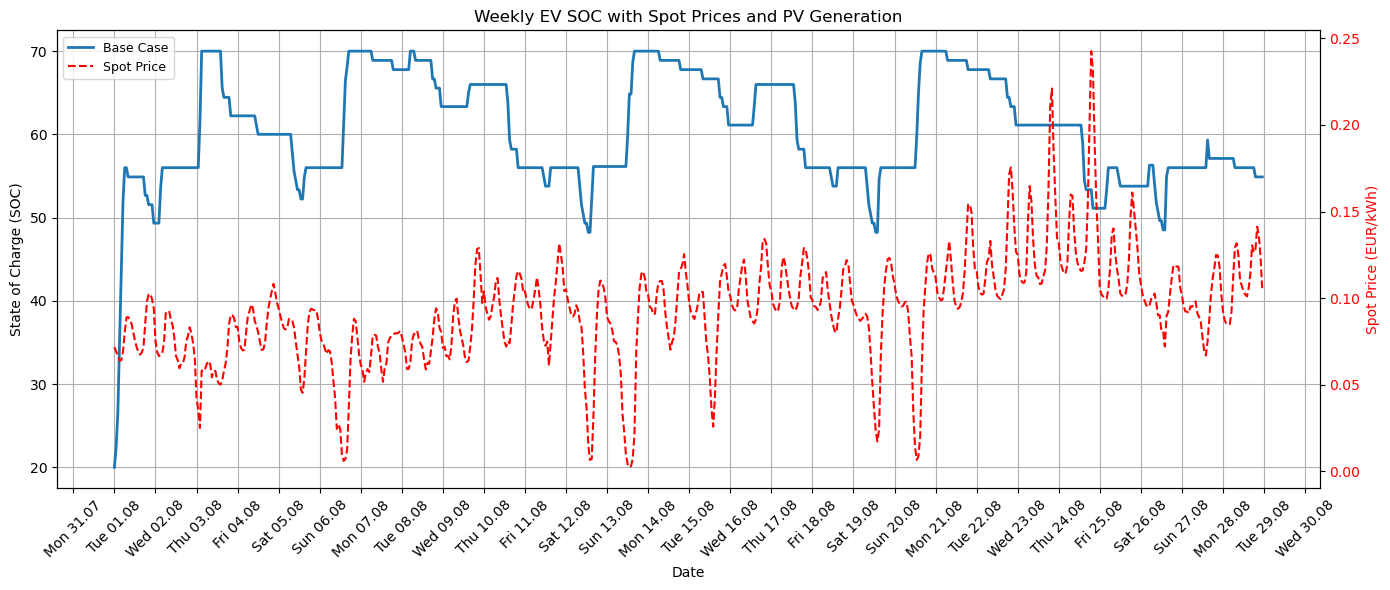

In [14]:
# Example use:
df_dict = {
    "Base Case": results_basecase_summer,
    #"Case 1": results_case_1_summer,
    #"Case 2": results_case_2_summer,
    #"Case 3": results_case_3_summer,
}

plot_ev_soc_with_price_and_pv(df_dict)

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import os

def plot_case3_load_components(
    df,
    title="Case 3 - Load Components Overview",
    save_filename="case3_load_components.png",
    max_time=24 * 7,
):
    df['timestamp'] = pd.to_datetime(df['timestamp'])
    timestamps = df['timestamp'][:max_time]

    # Directly available columns
    total_load = df['Total_Demand'][:max_time]
    pv_to_home = df['PV2H'][:max_time]
    ev_v2h = df['EV_V2H'][:max_time]
    ev_v2g = df['EV_V2G'][:max_time]
    unmet = df['Unmet'][:max_time]

    # Inflexible load calculated from binary appliance signals
    inflexible_load =  df['Inflexible_Demand_(kWh)'][:max_time]

    plt.figure(figsize=(14, 6))

    plt.plot(timestamps, total_load, label='Total Load', linewidth=2)
    plt.plot(timestamps, inflexible_load, label='Inflexible Load', linewidth=2)
    plt.plot(timestamps, pv_to_home, label='PV to Home (PV2H)', linestyle='--', linewidth=2)
    plt.plot(timestamps, ev_v2h, label='EV V2H', linestyle='--', linewidth=2)
    plt.plot(timestamps, ev_v2g, label='EV V2G', linestyle='--', linewidth=2)
    plt.plot(timestamps, unmet, label='Unmet Demand', linestyle=':', linewidth=2, color='red')

    plt.xlabel("Date")
    plt.ylabel("Power (kWh)")
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%a %d.%m'))
    plt.gca().xaxis.set_major_locator(mdates.DayLocator())
    plt.tight_layout()

    if 'figures_dir' in globals():
        plt.savefig(os.path.join(figures_dir, save_filename), dpi=300)
    else:
        plt.savefig(save_filename, dpi=300)

    plt.show()



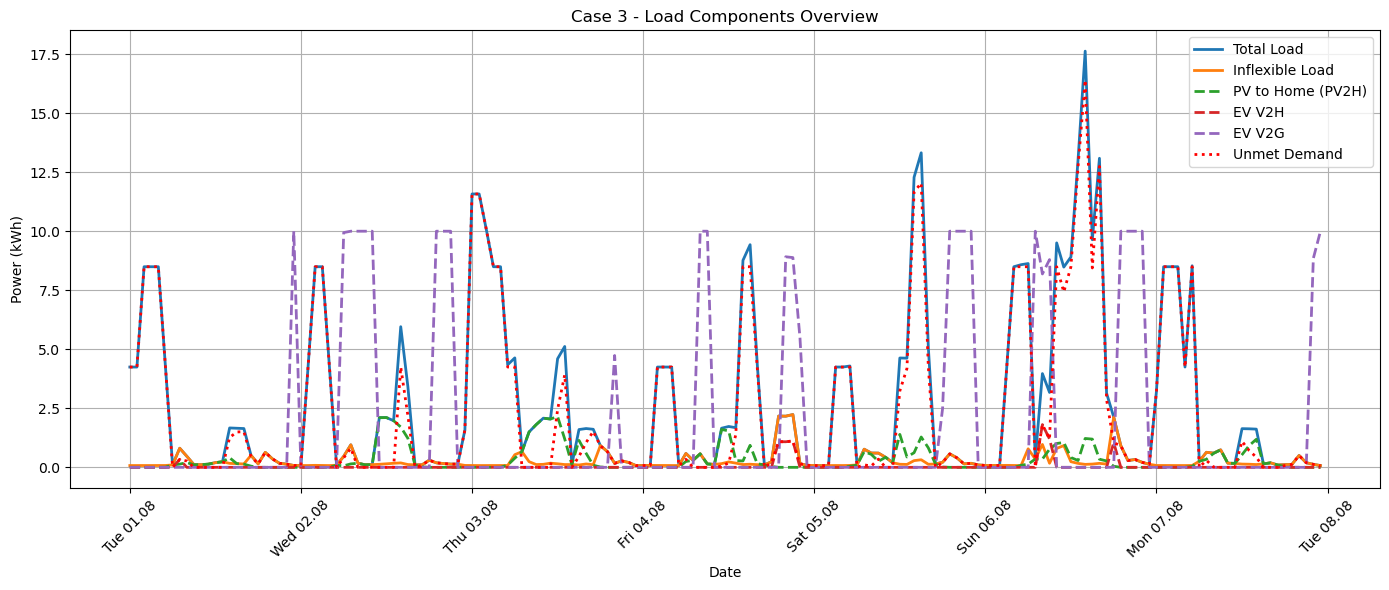

In [12]:

# Call the function with your DataFrame
plot_case3_load_components(results_case_3_summer)




In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import os

def plot_case2_load_components(
    df,
    title="Case 3 - Load Components Overview",
    save_filename="case3_load_components.png",
    max_time=24 * 7,
):
    df['timestamp'] = pd.to_datetime(df['timestamp'])
    timestamps = df['timestamp'][:max_time]

    # Directly available columns
    total_load = df['Total_Demand'][:max_time]
    pv_to_home = df['PV_energy_production_kWh'][:max_time]
    #ev_v2h = df['EV_V2H'][:max_time]
    unmet = df['Unmet'][:max_time]

    # Inflexible load calculated from binary appliance signals
    inflexible_load =  df['Inflexible_Demand_(kWh)'][:max_time]

    plt.figure(figsize=(14, 6))

    plt.plot(timestamps, total_load, label='Total Load', linewidth=2)
    plt.plot(timestamps, inflexible_load, label='Inflexible Load', linewidth=2)
    plt.plot(timestamps, pv_to_home, label='PV electricity production', linestyle='--', linewidth=2)
    #plt.plot(timestamps, ev_v2h, label='EV V2H', linestyle='--', linewidth=2)
    plt.plot(timestamps, unmet, label='Unmet Demand', linestyle=':', linewidth=2, color='red')

    plt.xlabel("Date")
    plt.ylabel("Power (kWh)")
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%a %d.%m'))
    plt.gca().xaxis.set_major_locator(mdates.DayLocator())
    plt.tight_layout()

    if 'figures_dir' in globals():
        plt.savefig(os.path.join(figures_dir, save_filename), dpi=300)
    else:
        plt.savefig(save_filename, dpi=300)

    plt.show()


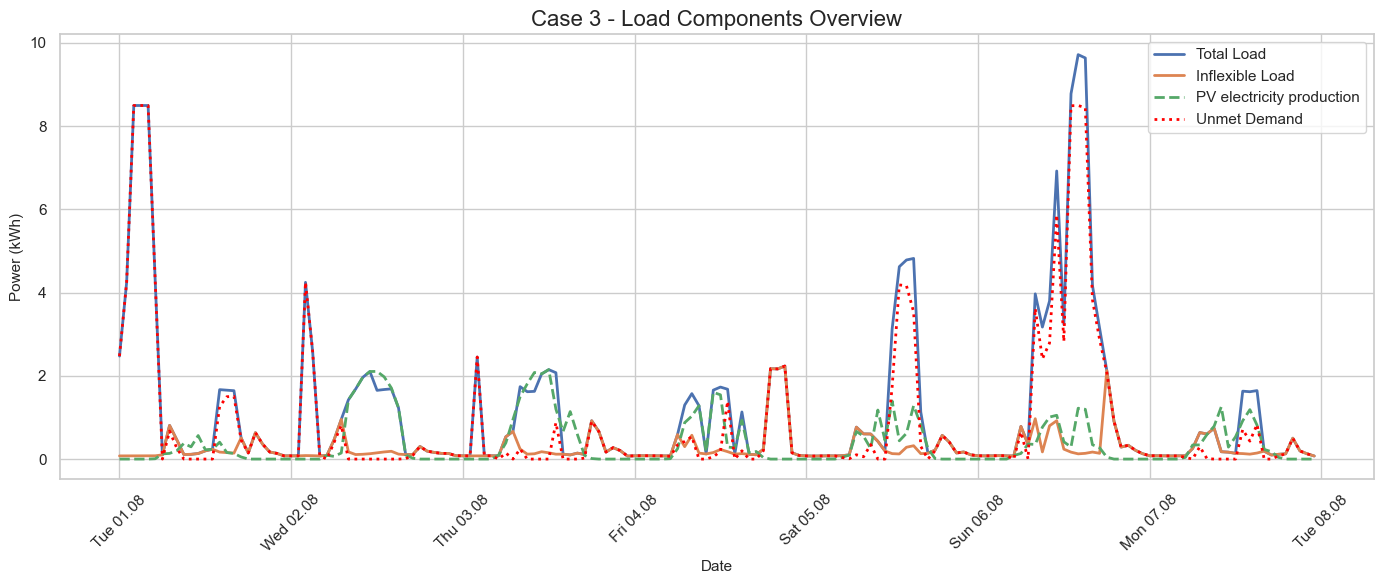

In [14]:
plot_case2_load_components(results_case_2_summer)